In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('/content/HepatitisCdata.csv') 
df.head(5)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [3]:
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [4]:
#handling null values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer.fit(df.iloc[:,[4,5,6,10,13]])
df.iloc[:,[4,5,6,10,13]]=imputer.transform(df.iloc[:,[4,5,6,10,13]])

In [5]:
df.isnull().sum()

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

In [6]:
df= df.drop(["Unnamed: 0"], axis=1)

In [7]:
df['Category'].loc[df['Category'].isin(["1=Hepatitis","2=Fibrosis", "3=Cirrhosis"])] = 1
df['Category'].loc[df['Category'].isin(["0=Blood Donor", "0s=suspect Blood Donor"])] = 0

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [8]:
labelencoder = LabelEncoder()
#df['Category'] = labelencoder.fit_transform(df['Category'])
df['Sex'] = labelencoder.fit_transform(df['Sex'])

In [9]:
df.head(5)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [10]:
df.shape

(615, 13)

In [12]:
df['Category'] = df['Category'].astype('int64')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    int64  
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    int64  
 3   ALB       615 non-null    float64
 4   ALP       615 non-null    float64
 5   ALT       615 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      615 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      615 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 62.6 KB


In [14]:
df.nunique()

Category      2
Age          49
Sex           2
ALB         190
ALP         415
ALT         342
AST         297
BIL         188
CHE         407
CHOL        314
CREA        117
GGT         358
PROT        199
dtype: int64

In [15]:
print("Category 0: ",len(df.loc[df['Category'] == 0]))
print("Category 1: ",len(df.loc[df['Category'] == 1]))

Category 0:  540
Category 1:  75


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc13c141460>,
      dtype=object)

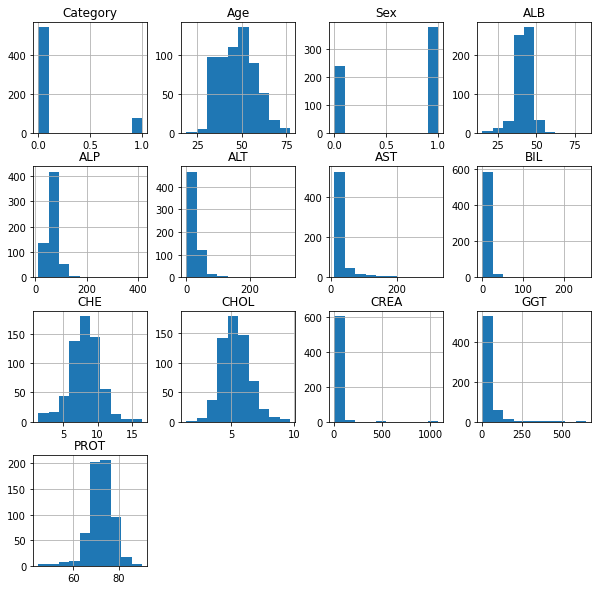

In [16]:
df.hist(figsize=[10,10])

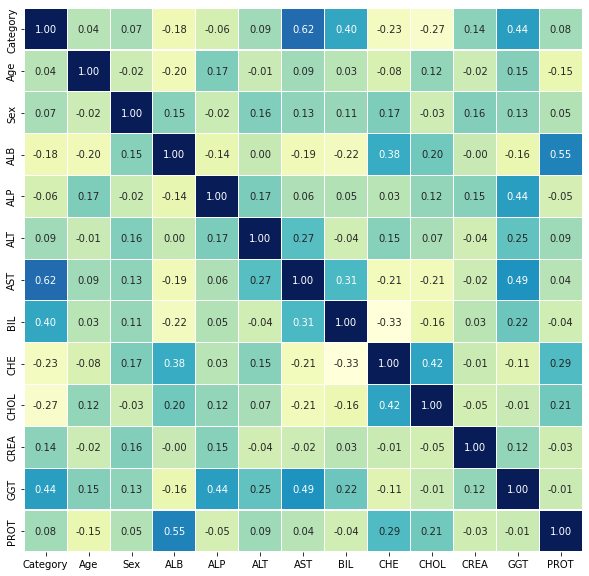

In [17]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f', cmap="YlGnBu", cbar= False)
plt.show()

In [18]:
df.drop(['ALB','CHE','CHOL'],inplace=True,axis=1)

In [19]:
df.head(5)

,Category,Age,Sex,ALP,ALT,AST,BIL,CREA,GGT,PROT
0,0,32,1,52.5,7.7,22.1,7.5,106.0,12.1,69.0
1,0,32,1,70.3,18.0,24.7,3.9,74.0,15.6,76.5
2,0,32,1,74.7,36.2,52.6,6.1,86.0,33.2,79.3
3,0,32,1,52.0,30.6,22.6,18.9,80.0,33.8,75.7
4,0,32,1,74.1,32.6,24.8,9.6,76.0,29.9,68.7


In [20]:
df.describe()

,Category,Age,Sex,ALP,ALT,AST,BIL,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,0.121951,47.408130,0.613008,68.283920,28.450814,34.786341,11.396748,81.287805,39.533171,72.044137
std,0.327496,10.055105,0.487458,25.643955,25.448940,33.090690,19.673150,49.756166,54.661071,5.398234
min,0.000000,19.000000,0.000000,11.300000,0.900000,10.600000,0.800000,8.000000,4.500000,44.800000
25%,0.000000,39.000000,0.000000,52.950000,16.400000,21.600000,5.300000,67.000000,15.700000,69.300000
50%,0.000000,47.000000,1.000000,66.700000,23.000000,25.900000,7.300000,77.000000,23.300000,72.200000
75%,0.000000,54.000000,1.000000,79.300000,33.050000,32.900000,11.200000,88.000000,40.200000,75.400000
max,1.000000,77.000000,1.000000,416.600000,325.300000,324.000000,254.000000,1079.100000,650.900000,90.000000


In [21]:
X=df.drop(['Category'],axis=1)
y=df['Category']

In [22]:
q1 = X.quantile(0.25)
q3 = X.quantile(0.75)
percentile =pd.DataFrame([q1,q3])
percentile

,Age,Sex,ALP,ALT,AST,BIL,CREA,GGT,PROT
0.25,39.0,0.0,52.95,16.40,21.6,5.3,67.0,15.7,69.3
0.75,54.0,1.0,79.30,33.05,32.9,11.2,88.0,40.2,75.4


In [23]:
iqr = q3 - q1
iqr_df=pd.DataFrame([iqr])
iqr_df

,Age,Sex,ALP,ALT,AST,BIL,CREA,GGT,PROT
0,15.0,1.0,26.35,16.65,11.3,5.9,21.0,24.5,6.1


In [24]:
lower_lim = q1 - 1.5 * iqr
upper_lim = q3 + 1.5 * iqr

In [25]:
lower=pd.DataFrame(lower_lim)
upper=pd.DataFrame(upper_lim)
lower_up = lower.rename(columns = {0:'lower limit'})
upper_up = upper.rename(columns = {0:'upper limit'})
lower_limit_df=lower_up.T
upper_limit_df=upper_up.T
#df_mix_max_limit=lower.append(upper)
df_up=pd.concat([lower_limit_df, upper_limit_df])
df_up.head(2)

,Age,Sex,ALP,ALT,AST,BIL,CREA,GGT,PROT
lower limit,16.5,-1.5,13.425,-8.575,4.65,-3.55,35.5,-21.05,60.15
upper limit,76.5,2.5,118.825,58.025,49.85,20.05,119.5,76.95,84.55


In [26]:
data = X[(X>lower_lim)&(X<upper_lim)]
data.head(5)

,Age,Sex,ALP,ALT,AST,BIL,CREA,GGT,PROT
0,32.0,1,52.5,7.7,22.1,7.5,106.0,12.1,69.0
1,32.0,1,70.3,18.0,24.7,3.9,74.0,15.6,76.5
2,32.0,1,74.7,36.2,NaN,6.1,86.0,33.2,79.3
3,32.0,1,52.0,30.6,22.6,18.9,80.0,33.8,75.7
4,32.0,1,74.1,32.6,24.8,9.6,76.0,29.9,68.7


In [27]:
data.isnull().sum()

Age      1
Sex      0
ALP     14
ALT     36
AST     64
BIL     47
CREA    12
GGT     65
PROT    20
dtype: int64

In [28]:
data_final=data.fillna(data.mean())
data_final.head(5)

,Age,Sex,ALP,ALT,AST,BIL,CREA,GGT,PROT
0,32.0,1,52.5,7.7,22.100000,7.5,106.0,12.1,69.0
1,32.0,1,70.3,18.0,24.700000,3.9,74.0,15.6,76.5
2,32.0,1,74.7,36.2,26.207804,6.1,86.0,33.2,79.3
3,32.0,1,52.0,30.6,22.600000,18.9,80.0,33.8,75.7
4,32.0,1,74.1,32.6,24.800000,9.6,76.0,29.9,68.7


In [29]:
data_final

,Age,Sex,ALP,ALT,AST,BIL,CREA,GGT,PROT
0,32.0,1,52.500000,7.700000,22.100000,7.500000,106.0,12.100000,69.0
1,32.0,1,70.300000,18.000000,24.700000,3.900000,74.0,15.600000,76.5
2,32.0,1,74.700000,36.200000,26.207804,6.100000,86.0,33.200000,79.3
3,32.0,1,52.000000,30.600000,22.600000,18.900000,80.0,33.800000,75.7
4,32.0,1,74.100000,32.600000,24.800000,9.600000,76.0,29.900000,68.7
...,...,...,...,...,...,...,...,...,...
610,62.0,0,66.321149,5.900000,26.207804,7.955106,55.7,26.229455,68.5
611,64.0,0,102.800000,2.900000,44.400000,20.000000,63.0,35.900000,71.3
612,64.0,0,87.300000,3.500000,26.207804,7.955106,66.7,64.200000,82.0
613,46.0,0,68.283920,39.000000,26.207804,20.000000,52.0,50.000000,71.0


In [30]:
import pandas as pd
from sklearn import preprocessing

x1 = X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x1)
df_scaled = pd.DataFrame(x_scaled)
df_scaled.head()

,0,1,2,3,4,5,6,7,8
0,0.224138,1.0,0.101653,0.020962,0.036694,0.026461,0.091495,0.011757,0.535398
1,0.224138,1.0,0.145571,0.052713,0.044990,0.012243,0.061619,0.017172,0.701327
2,0.224138,1.0,0.156427,0.108816,0.134014,0.020932,0.072822,0.044400,0.763274
3,0.224138,1.0,0.100419,0.091554,0.038290,0.071485,0.067221,0.045328,0.683628
4,0.224138,1.0,0.154947,0.097719,0.045310,0.034755,0.063486,0.039295,0.528761


In [31]:
from sklearn.model_selection import train_test_split # splitting the data
X_train, X_test, y_train, y_test = train_test_split(df_scaled.values, y, train_size=0.8,random_state=42)

In [32]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier


from sklearn.metrics import confusion_matrix,matthews_corrcoef,classification_report
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

In [33]:
lr=LogisticRegression().fit(X_train,y_train)
et=ExtraTreesClassifier().fit(X_train,y_train)
rf=RandomForestClassifier().fit(X_train,y_train)
knn=KNeighborsClassifier().fit(X_train,y_train)
svc=SVC(probability=True).fit(X_train,y_train)

In [34]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef

# Assuming you have 5 classifiers and their predicted and actual labels as below
y_true = y_test
y_pred_1 = lr.predict(X_test)
y_pred_2 = et.predict(X_test)
y_pred_3 = rf.predict(X_test)
y_pred_4 = knn.predict(X_test)
y_pred_5 = svc.predict(X_test)

preds = [y_pred_1, y_pred_2, y_pred_3, y_pred_4, y_pred_5]

for i, y_pred in enumerate(preds, 1):
    print("Classifier ", i)
    # Accuracy
    acc = accuracy_score(y_true, y_pred, )
    print("Accuracy: ", acc)
    
    # Precision
    precision = precision_score(y_true, y_pred, average='macro')
    print("Precision: ", precision)
    
    # Recall
    recall = recall_score(y_true, y_pred, average='macro')
    print("Recall: ", recall)
    
    # F1-score
    f1 = f1_score(y_true, y_pred, average='macro')
    print("F1-score: ", f1)
    
    # MCC
    cm = confusion_matrix(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    print("MCC: ", mcc)
    print("Confusion Matrix : ", cm)
    print("\n")

Classifier  1
Accuracy:  0.8211382113821138
Precision:  0.9090909090909092
Recall:  0.5416666666666666
F1-score:  0.5269230769230769
MCC:  0.26111648393354675
Confusion Matrix :  [[99  0]
 [22  2]]


Classifier  2
Accuracy:  0.9024390243902439
Precision:  0.9138269986893841
Recall:  0.7657828282828283
F1-score:  0.813259109311741
MCC:  0.6632891077997851
Confusion Matrix :  [[98  1]
 [11 13]]


Classifier  3
Accuracy:  0.926829268292683
Precision:  0.9328523862375139
Recall:  0.8282828282828283
F1-score:  0.8682926829268292
MCC:  0.7539177822097638
Confusion Matrix :  [[98  1]
 [ 8 16]]


Classifier  4
Accuracy:  0.8292682926829268
Precision:  0.8152542372881356
Recall:  0.5782828282828283
F1-score:  0.5895439377085651
MCC:  0.31419098219434066
Confusion Matrix :  [[98  1]
 [20  4]]


Classifier  5
Accuracy:  0.8455284552845529
Precision:  0.8509852216748768
Recall:  0.619949494949495
F1-score:  0.6493623405851463
MCC:  0.4103681277810839
Confusion Matrix :  [[98  1]
 [18  6]]




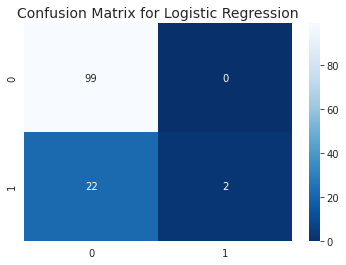

In [36]:
# Having a look at the confusion matrix for Logistic Regression

from sklearn.metrics import confusion_matrix, classification_report
sns.set_style("white")
y_pred_lr = lr.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Logistic Regression", fontsize=14, fontname="Helvetica", y=1.03);

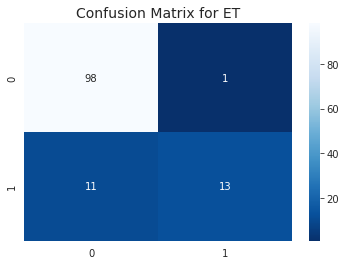

In [37]:
# Having a look at the confusion matrix for Logistic Regression

from sklearn.metrics import confusion_matrix, classification_report
sns.set_style("white")
y_pred_et = et.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_et)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for ET", fontsize=14, fontname="Helvetica", y=1.03);

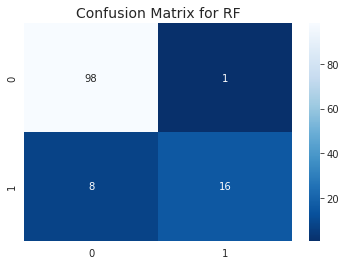

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
sns.set_style("white")
y_pred_rf = rf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for RF", fontsize=14, fontname="Helvetica", y=1.03);

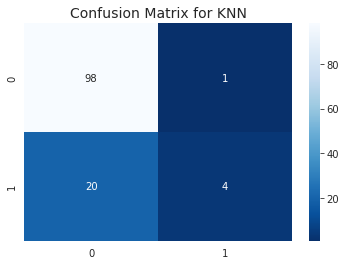

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
sns.set_style("white")
y_pred_knn = knn.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for KNN", fontsize=14, fontname="Helvetica", y=1.03);

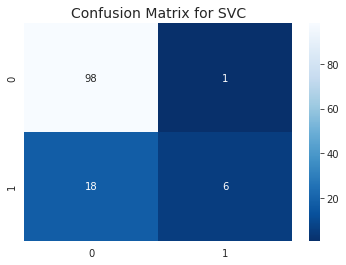

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
sns.set_style("white")
y_pred_svc = svc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for SVC", fontsize=14, fontname="Helvetica", y=1.03);

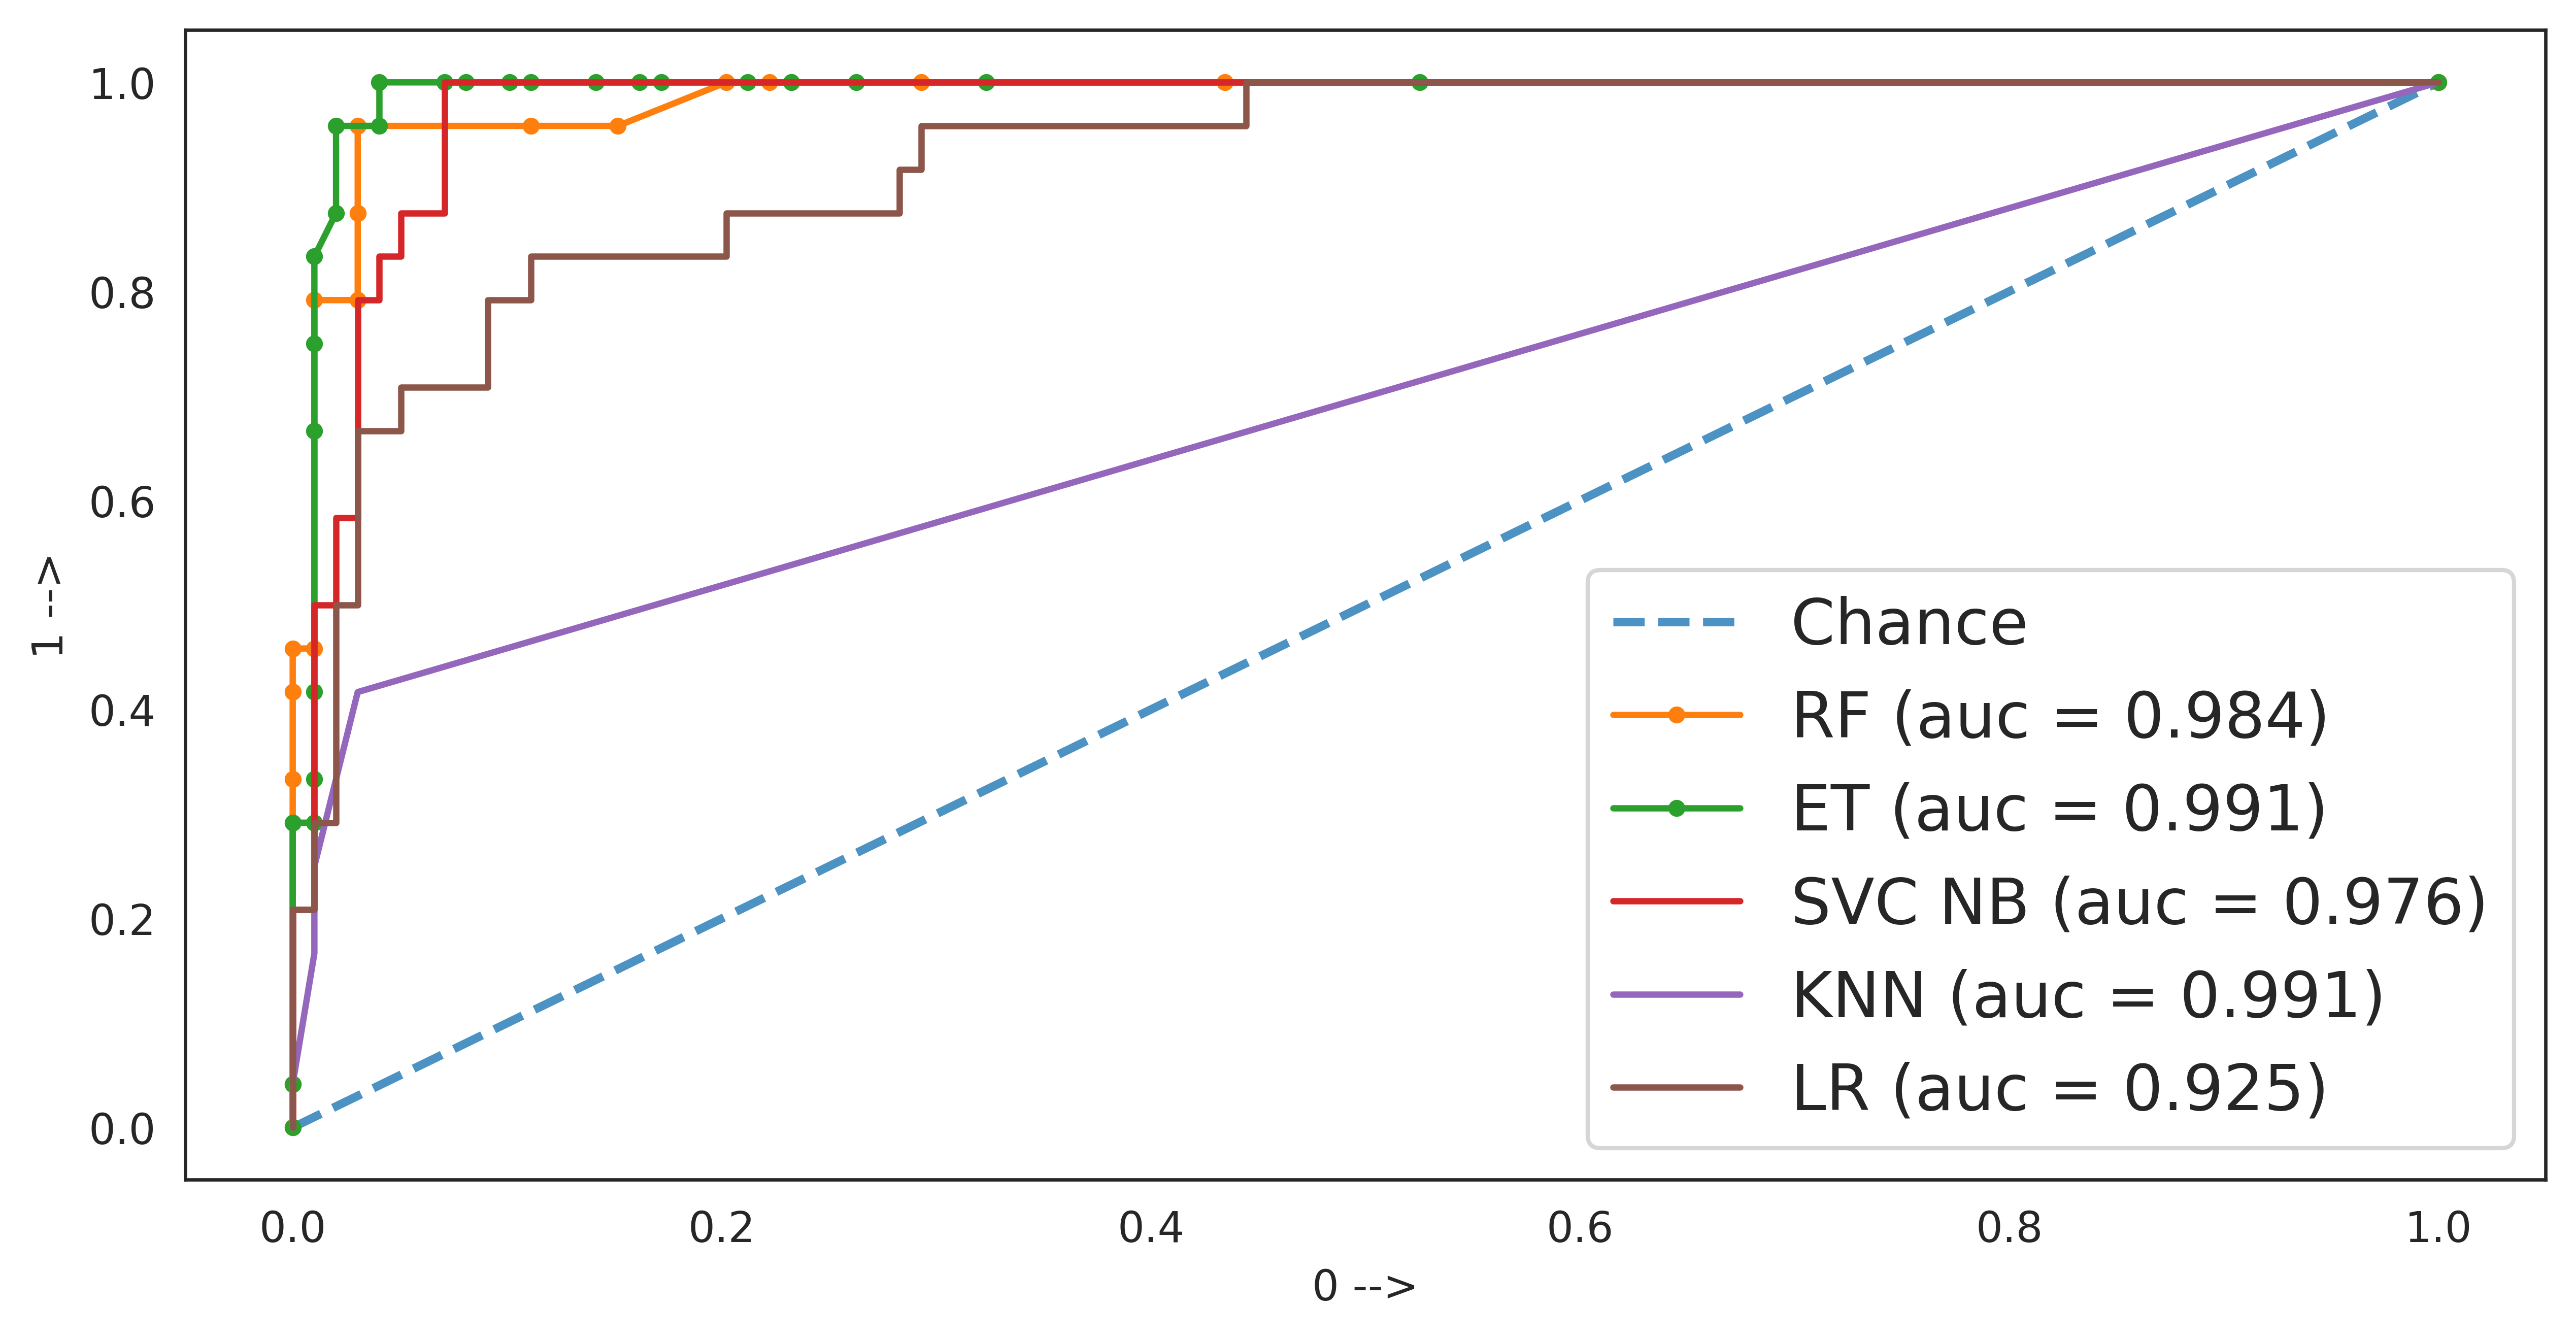

In [41]:
# replace X1 with X_test and Y1 with y_test
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_1 = lr.predict(X_test)
y_pred_2 = et.predict(X_test)
y_pred_3 = rf.predict(X_test)
y_pred_4 = knn.predict(X_test)
y_pred_5 = svc.predict(X_test)



rf_probs = rf.predict_proba(X_test)
rf_probs = rf_probs[:, 1]
#clf3=clf3[:,1]
rf_auc = roc_auc_score(y_test, rf_probs, multi_class= "ovr")
rf_fpr, rf_tpr, threshold = roc_curve(y_test, rf_probs)

lr_probs = lr.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
#clf1=clf1[:,1]
lr_auc = roc_auc_score(y_test, lr_probs, multi_class= "ovr")
lr_fpr, lr_tpr, threshold = roc_curve(y_test, lr_probs)

#ADA
knn_probs = knn.predict_proba(X_test)
knn_probs = knn_probs[:, 1]
#clf4=clf4[:,1]
knn_auc = roc_auc_score(y_test, knn_probs, multi_class= "ovr")
knn_fpr, knn_tpr, threshold = roc_curve(y_test, knn_probs)

#MLP
#lr_probs = clf6.predict_proba(X_test)
#lr_probs = lr_probs[:, 1]
#clf6=clf6[:,1]
#lr_auc = roc_auc_score(y_test, lr_probs)
#lr_fpr, lr_tpr, thresholdb = roc_curve(y_test, lr_probs)

et_probs = et.predict_proba(X_test)
et_probs = et_probs[:, 1]
#clf4=clf4[:,1]
et_auc = roc_auc_score(y_test, et_probs, multi_class= "ovr")
et_fpr, et_tpr, threshold = roc_curve(y_test, et_probs)

svc_probs = svc.predict_proba(X_test)
svc_probs = svc_probs[:, 1]
#clf5=clf5[:,1]
svc_auc = roc_auc_score(y_test, svc_probs, multi_class= "ovr")
svc_fpr, svc_tpr, thresholde = roc_curve(y_test, svc_probs)

#['purple', 'orange', 'brown', 'gray', 'pink']

plt.figure(figsize=(10, 5), dpi=600)
plt.plot([0, 1], [0, 1], linestyle="--", lw=2,  label="Chance", alpha=0.8)
plt.plot(rf_fpr, rf_tpr, marker='.', label='RF (auc = %0.3f)' % rf_auc)
plt.plot(et_fpr, et_tpr, marker='.', label='ET (auc = %0.3f)' % et_auc)
plt.plot(svc_fpr, svc_tpr, linestyle='-', label='SVC NB (auc = %0.3f)' % svc_auc)
plt.plot(knn_fpr, knn_tpr, linestyle='-', label='KNN (auc = %0.3f)' % et_auc)
plt.plot(lr_fpr, lr_tpr, linestyle='-', label='LR (auc = %0.3f)' % lr_auc)

#plt.plot(st_fpr, st_tpr, linestyle='-',color='black', label='Stack (ET,RF) (auc = %0.3f)' % st_auc)




plt.xlabel('0 -->')
plt.ylabel('1 -->')

plt.legend(loc="lower right", fontsize=15, ncol=1)

plt.show()